In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gs
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

: 


<h1>About Dataset<h1>
<h2>Context:<h2>
<p>The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.<p>

<h2>Content::<h2>
<p>Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:<p>
<ol>
<li>school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
<li>sex - student's sex (binary: 'F' - female or 'M' - male)
<li>age - student's age (numeric: from 15 to 22)
<li>address - student's home address type (binary: 'U' - urban or 'R' - rural)
<li>famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
<li>Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
<li>Medu - mother's education (numeric: 0 - none, 1 - primary <li>education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
<li>Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
<li>Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
<li>Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
<li>reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
<li>guardian - student's guardian (nominal: 'mother', 'father' or 'other')
<li>traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
<li>studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
<li>failures - number of past class failures (numeric: n if 1<=n<3, else 4)
<li>schoolsup - extra educational support (binary: yes or no)
<li>famsup - family educational support (binary: yes or no)
<li>paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
<li>activities - extra-curricular activities (binary: yes or no)
nursery - attended nursery school (binary: yes or no)
<li>higher - wants to take higher education (binary: yes or no)
<li>internet - Internet access at home (binary: yes or no)
<li>romantic - with a romantic relationship (binary: yes or no)
<li>famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
<li>freetime - free time after school (numeric: from 1 - very low to 5 - very high)
<li>goout - going out with friends (numeric: from 1 - very low to 5 - very high)
<li>Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
<li>Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
<li>health - current health status (numeric: from 1 - very bad to 5 - very good)
<li>absences - number of school absences (numeric: from 0 to 93)
<p>These grades are related with the course subject, Math or Portuguese:<p>

<li>G1 - first period grade (numeric: from 0 to 20)
<li>G2 - second period grade (numeric: from 0 to 20)
<li>G3 - final grade (numeric: from 0 to 20, output target)
</ol>
<p>
Additional note: there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.</p>

<p>Source Information
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

Fabio Pagnotta, Hossain Mohammad Amran.
Email:fabio.pagnotta@studenti.unicam.it, mohammadamra.hossain '@' studenti.unicam.it
University Of Camerino</p>

<p>https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION</p>



In [116]:
df = pd.read_csv("student-por.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [118]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [119]:
df.isnull().sum().max()

0

In [120]:
df.shape

(649, 33)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'Medu'),
  Text(0, 2.5, 'Fedu'),
  Text(0, 3.5, 'traveltime'),
  Text(0, 4.5, 'studytime'),
  Text(0, 5.5, 'failures'),
  Text(0, 6.5, 'famrel'),
  Text(0, 7.5, 'freetime'),
  Text(0, 8.5, 'goout'),
  Text(0, 9.5, 'Dalc'),
  Text(0, 10.5, 'Walc'),
  Text(0, 11.5, 'health'),
  Text(0, 12.5, 'absences'),
  Text(0, 13.5, 'G1'),
  Text(0, 14.5, 'G2'),
  Text(0, 15.5, 'G3')])

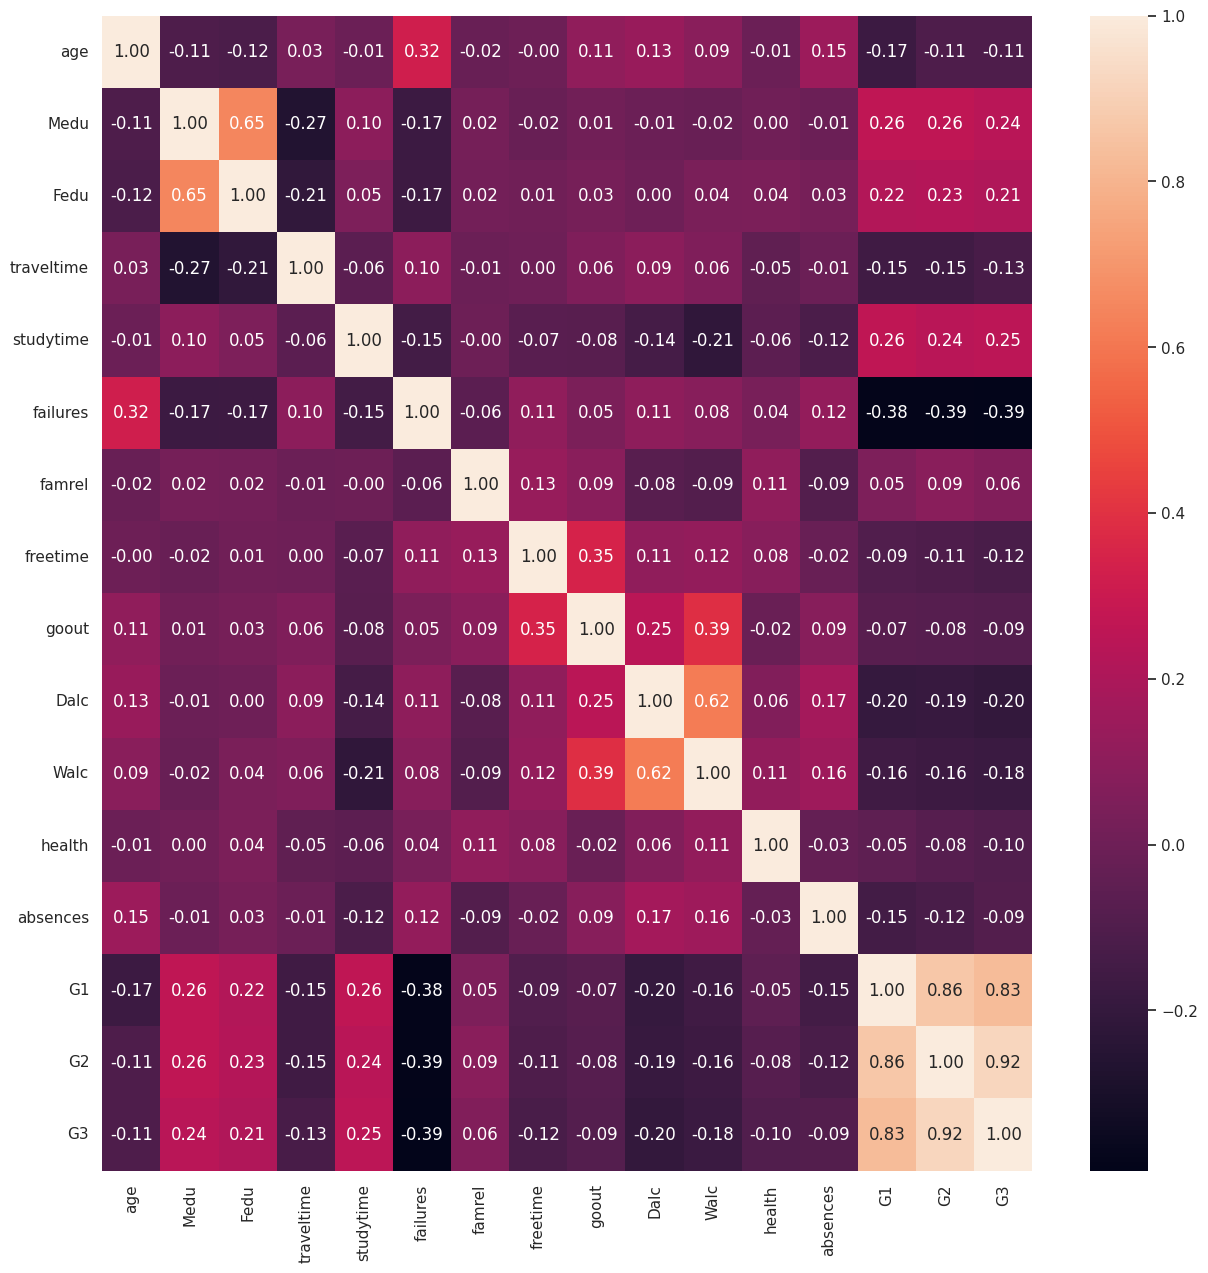

In [121]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)


<p>We observe a strong positive correlation between the 3 grades G1, G2, G3. This means that as G1 increases, G2 and G3 also increase.</p>
<p>We can see a weak positive correlation between age and absences. This means that as age increases, absences increase weakly.</p>
<p>There is also a weak negative correlation between age,absences with respect to grades G1, G2, G3. This means that as age increases, or absences, grades decrease. </p>

In [122]:
cat = df.select_dtypes(include = ['object', 'category'])
num = df.select_dtypes(include = 'number')

cat.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no


In [123]:
num.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13


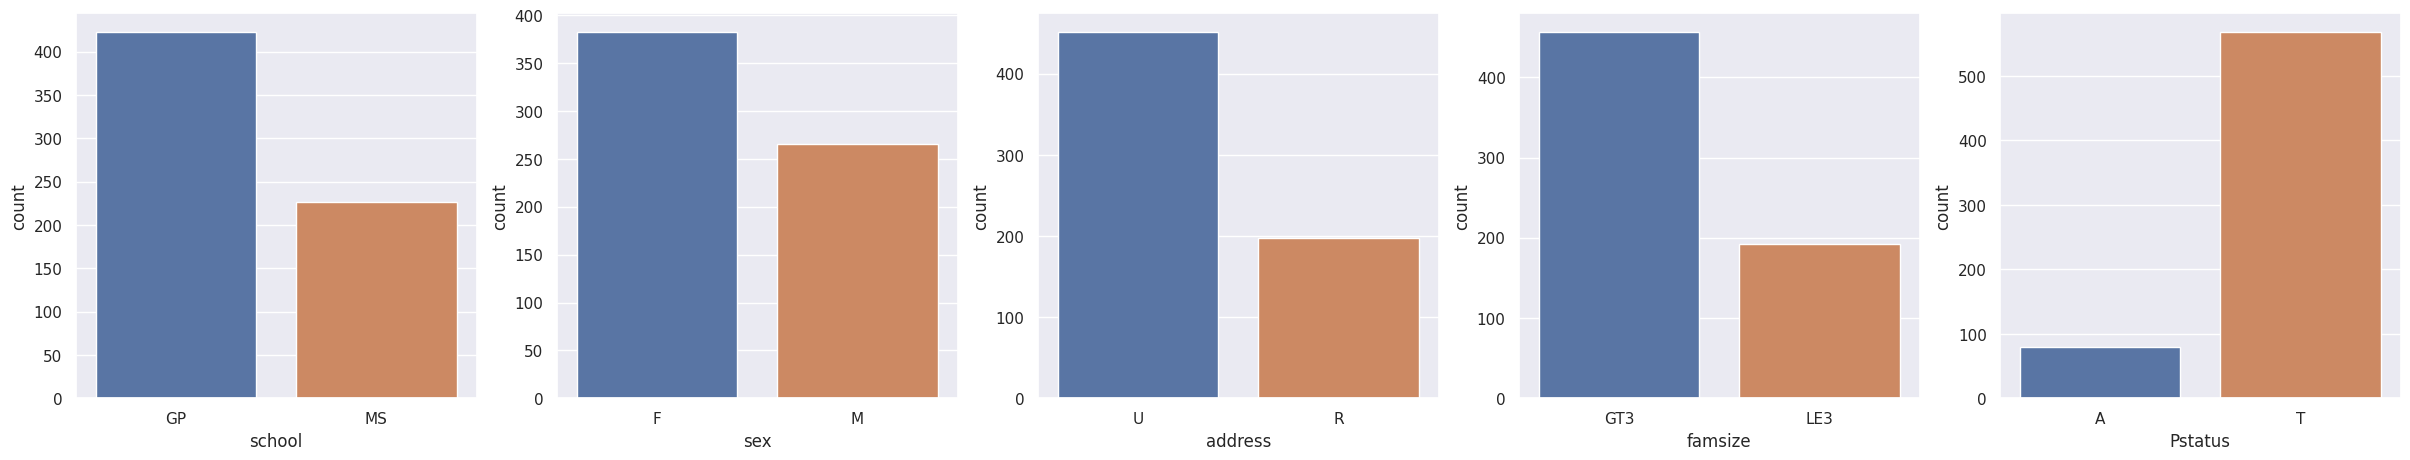

In [124]:

# Check For Linearity (regplot)
def relationship(dataframe, a, b, c, d, e):
    plt.figure(figsize = (30, 5))
    sns.set(style = 'darkgrid')


    plt.subplot(1, 5, 1)
    sns.countplot(x = df[a])

    plt.subplot(1, 5, 2)
    sns.countplot(x = df[b])

    plt.subplot(1, 5, 3)
    sns.countplot(x = df[c])

    plt.subplot(1, 5, 4)
    sns.countplot(x = df[d])

    plt.subplot(1, 5, 5)
    sns.countplot(x = df[e])

relationship(df, 'school','sex','address','famsize','Pstatus')

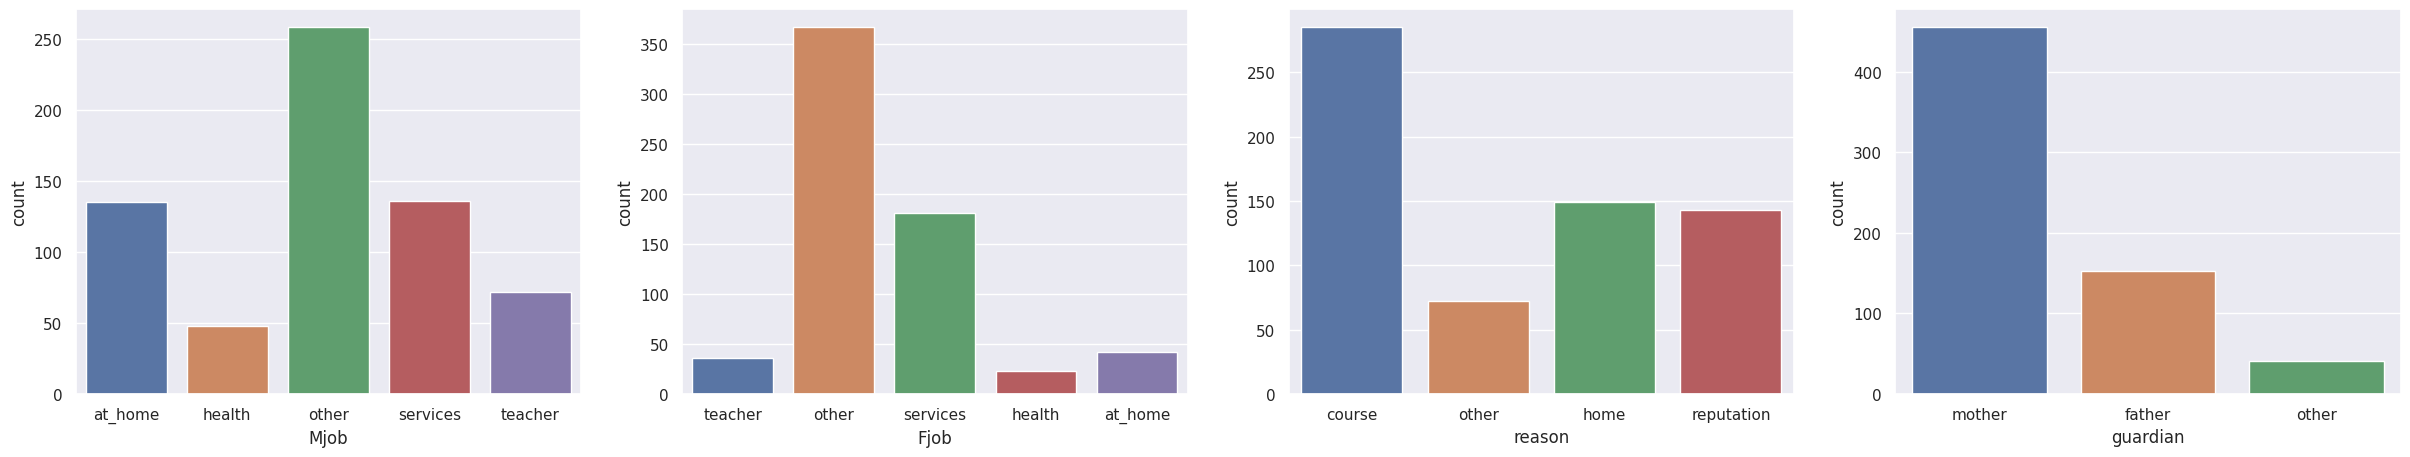

In [125]:
def relationship(dataframe, f, g, h ,i):
    plt.figure(figsize = (30, 5))
    sns.set(style = 'darkgrid')


    plt.subplot(1, 4, 1)
    sns.countplot(x = df[f])

    plt.subplot(1, 4, 2)
    sns.countplot(x = df[g])

    plt.subplot(1, 4, 3)
    sns.countplot(x = df[h])

    plt.subplot(1, 4, 4)
    sns.countplot(x = df[i])


relationship(df,'Mjob','Fjob','reason','guardian')


<h2>Comment:<h2>

<p><ol>
<li>TMother's and father's work prevails "other"</li>
<li>More students chose the school because of the course of study, others because it was close to home, because of the school's reputation, and a minority for other reasons.</li>
<li>Most students are followed by their mother,few by their father, and other<p>

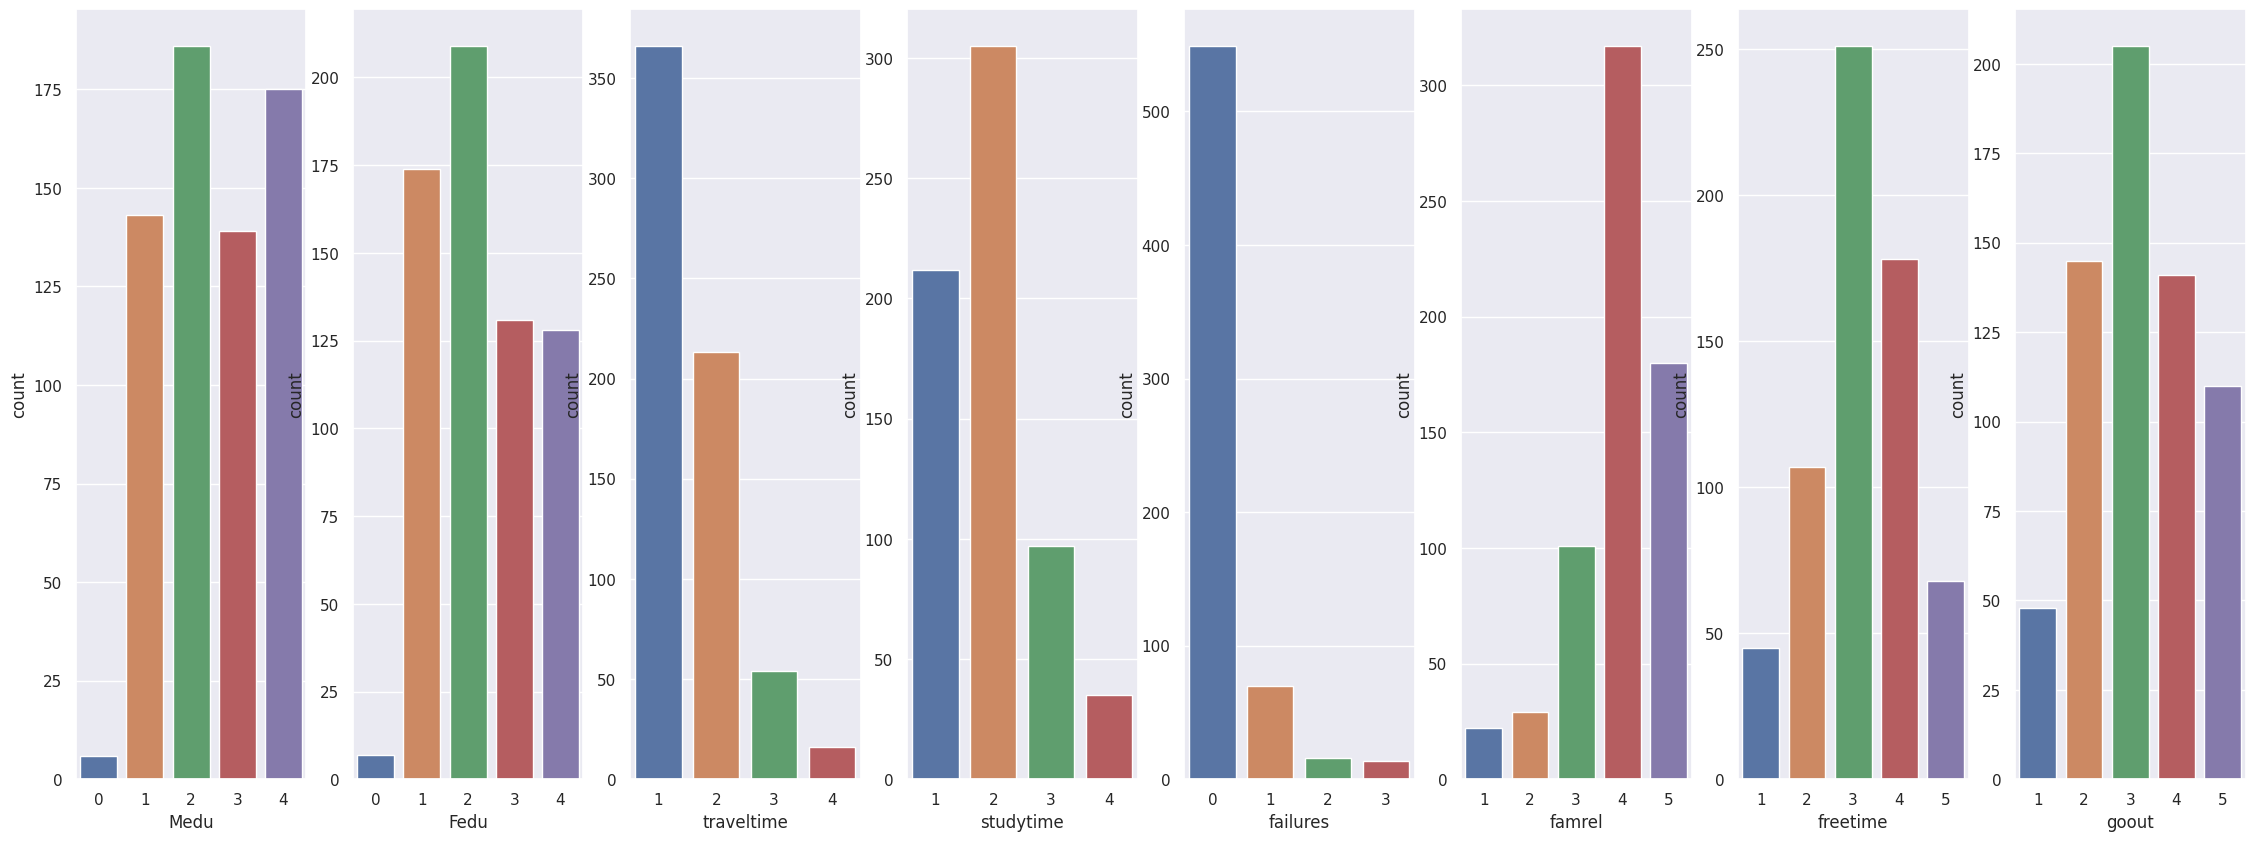

In [126]:
def relationship(dataframe, a, b, c, e, f, g, h ,i):
    plt.figure(figsize = (28, 10))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 8, 1)
    sns.countplot(x = df[a])

    plt.subplot(1, 8, 2)
    sns.countplot(x = df[b])

    plt.subplot(1, 8, 3)
    sns.countplot(x = df[c])

    plt.subplot(1, 8, 4)
    sns.countplot(x = df[e])

    plt.subplot(1, 8, 5)
    sns.countplot(x = df[f])

    plt.subplot(1, 8, 6)
    sns.countplot(x = df[g])

    plt.subplot(1, 8, 7)
    sns.countplot(x = df[h])

    plt.subplot(1, 8, 8)
    sns.countplot(x = df[i])

relationship(df,'Medu','Fedu','traveltime','studytime', 'failures', 'famrel', 'freetime', 'goout')

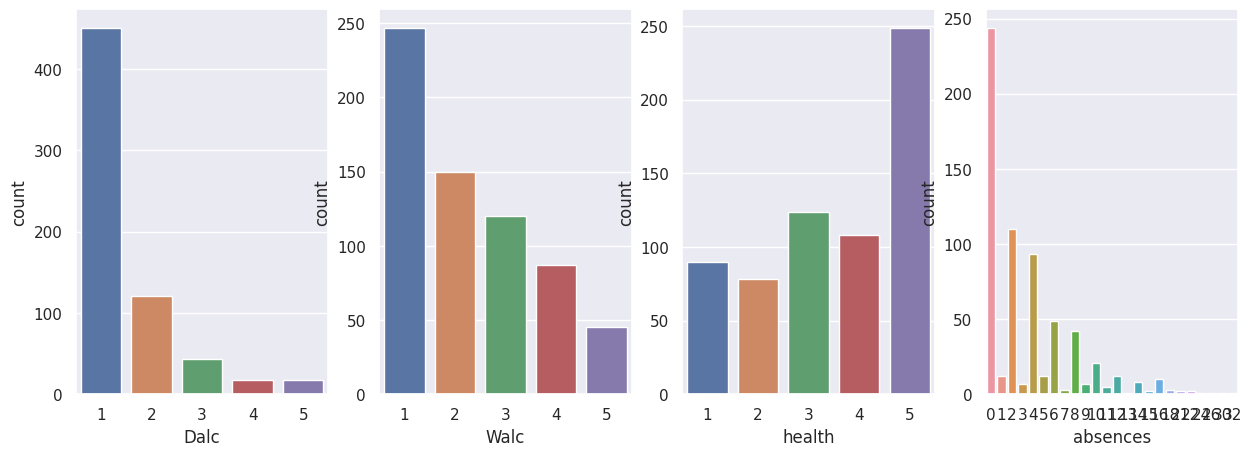

In [127]:
def relationship(dataframe, f, g, h ,i):
    plt.figure(figsize = (15, 5))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 4, 1)
    sns.countplot(x = df[f])

    plt.subplot(1, 4, 2)
    sns.countplot(x = df[g])

    plt.subplot(1, 4, 3)
    sns.countplot(x = df[h])

    plt.subplot(1, 4, 4)
    sns.countplot(x = df[i])


relationship(df,'Dalc','Walc','health','absences')


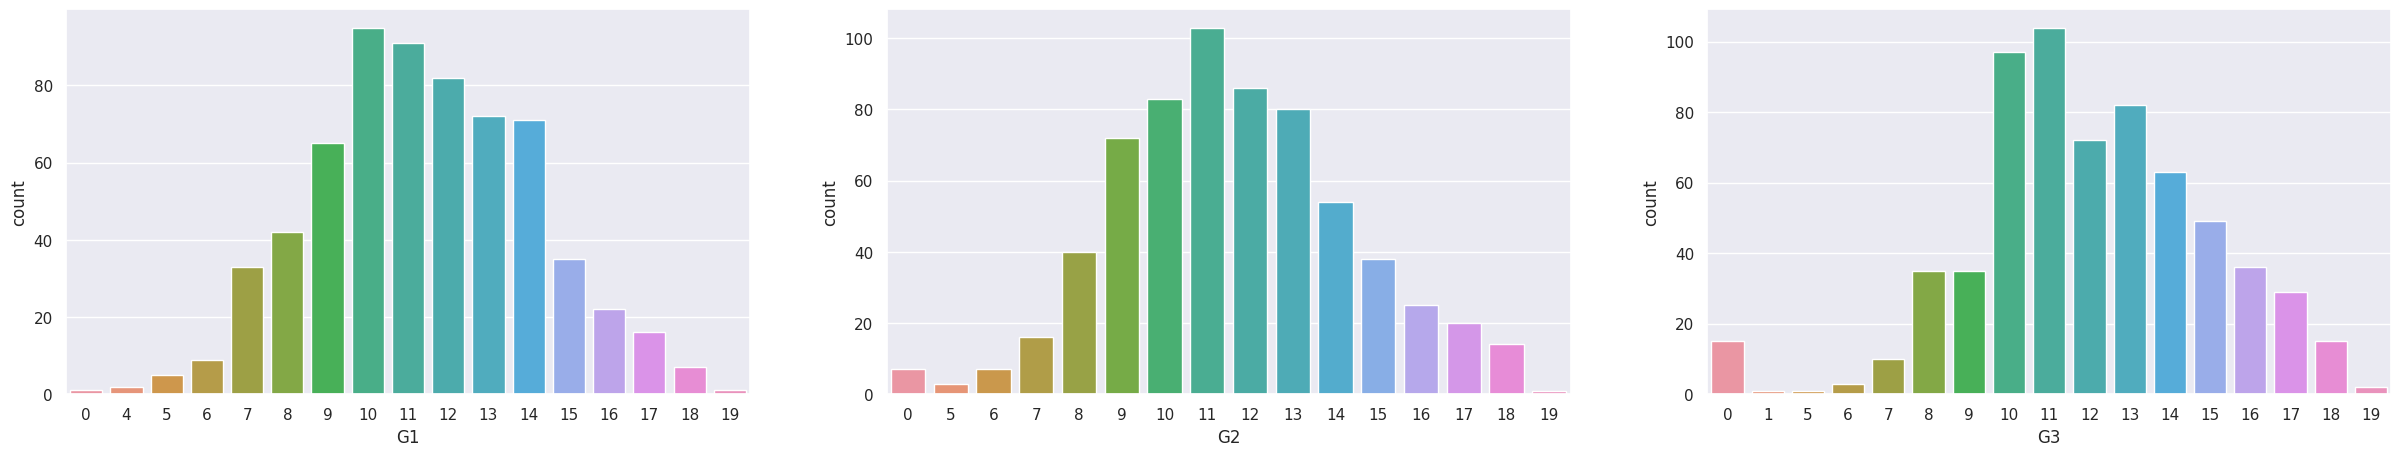

In [128]:
def relationship(dataframe, f, g, h):
    plt.figure(figsize = (30, 5))
    sns.set(style = 'darkgrid')


    plt.subplot(1, 3, 1)
    sns.countplot(x = df[f])

    plt.subplot(1, 3, 2)
    sns.countplot(x = df[g])

    plt.subplot(1, 3, 3)
    sns.countplot(x = df[h])

relationship(df,'G1','G2','G3')

<Axes: xlabel='age', ylabel='count'>

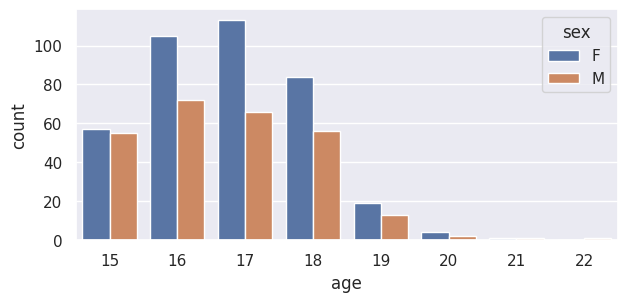

In [129]:
plt.figure(figsize=(7,3))
sns.countplot(x = df['age'], hue = df['sex'] )

More females than males are present

<Axes: xlabel='age', ylabel='absences'>

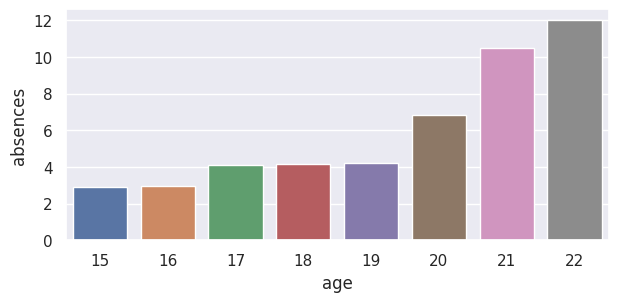

In [130]:
plt.figure(figsize=(7,3))
sns.barplot(x = df['age'], y = df['absences'], ci = 0 )

<h2>Comment:<h2>

<p><ol>
<li>
Students are mostly ages <= to 19 </li>
<li>We can see that the number of female pupils are averagely higher than male</li>
<li>Older student are mostly absence from class</li>


</ol><p/>




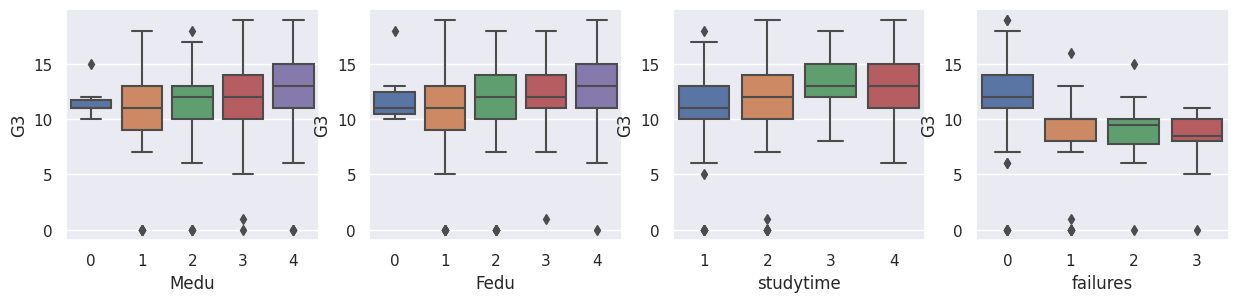

In [131]:
def relationship(dataframe, a, b, c, d):
    plt.figure(figsize=(15, 3))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 4, 1)
    sns.boxplot(x = df[a], y = df['G3'])

    plt.subplot(1, 4, 2)
    sns.boxplot(x = df[b], y = df['G3'])

    plt.subplot(1, 4, 3)
    sns.boxplot(x = df[c], y = df['G3'] )

    plt.subplot(1, 4, 4)
    sns.boxplot(x = df[d], y = df['G3'] )

relationship(df,'Medu', 'Fedu', 'studytime','failures')


<h2>Comment:<h2>

<p><ol>
<li>We see how grades increase as the level of parental education increases</li>
<li>We see how grades most student have not failed a course</li>
</ol><p/>



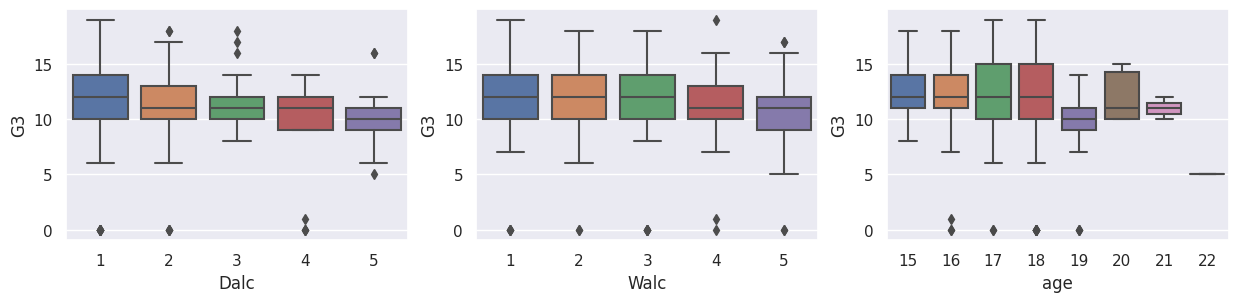

In [132]:
def relationship(dataframe, a, b, c):
    plt.figure(figsize=(15, 3))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 3, 1)
    sns.boxplot(x = df[a], y = df['G3'])

    plt.subplot(1, 3, 2)
    sns.boxplot(x = df[b], y = df['G3'])

    plt.subplot(1, 3, 3)
    sns.boxplot(x = df[c], y = df['G3'] )

relationship(df,'Dalc', 'Walc', 'age')


<h2>Comment:<h2>

<p><ol>
<li>We can see that in both cases as alcohol consumption increases, grades tend to decrease</li>
<li>We can see that Older student tend to fail and student with the best result are between Ages 18 and 19</li>

</ol><p/>


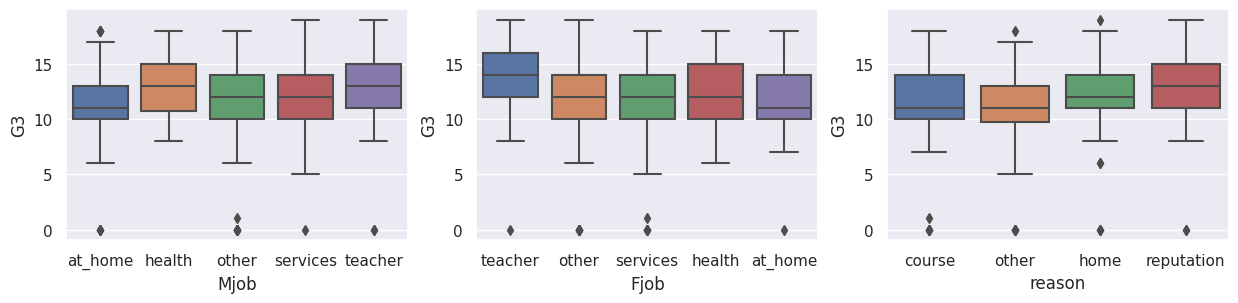

In [133]:
def relationship(dataframe, a, b, c):
    plt.figure(figsize=(15, 3))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 3, 1)
    sns.boxplot(x = df[a], y = df['G3'])

    plt.subplot(1, 3, 2)
    sns.boxplot(x = df[b], y = df['G3'])

    plt.subplot(1, 3, 3)
    sns.boxplot(x = df[c], y = df['G3'] )

relationship(df,"Mjob", "Fjob", "reason")


<h2>Comment:<h2>

<p><ol>
<li>TMother's and father's work prevails "other"</li>
<li>More students chose the school because of the course of study, others because it was close to home, because of the school's reputation, and a minority for other reasons.</li>
<li>Most students are followed by their mother,few by their father, and other<p>


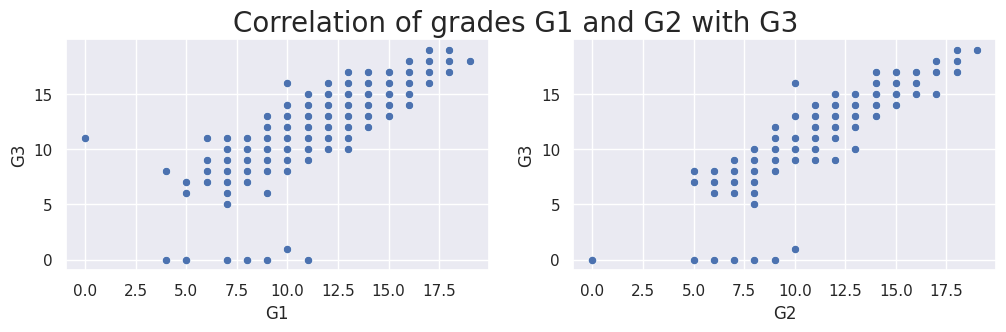

In [134]:
fig = plt.figure(figsize = (12,3))
plt.suptitle("Correlation of grades G1 and G2 with G3", size = 20)
g = gs.GridSpec(nrows = 1, ncols = 2, figure = fig)

ax1 = plt.subplot(g[0,0])
ax1 = sns.scatterplot(data = df, x = df["G1"], y = df["G3"])

ax2 = plt.subplot(g[0,1])
ax2 = sns.scatterplot(data = df, x = df["G2"], y = df["G3"])

In [135]:
train = df.sample(500)
test = df.sample(149)
test.to_csv('TestData.csv')

In [136]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
normalizing = MinMaxScaler()

for i in train.columns:
    if train[i].dtypes == 'int' or train[i].dtypes == 'float': # --------------- Select the numerical columns
        train[[i]] = scaler.fit_transform(train[[i]]) # ------------------------ Tranform the selected the numerical columns

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() # ---------------------------------------------------------- Instantiate encoding library
for i in train.columns: # ------------------------------------------------------ iterate through the columns and find all categoricals
    if train[i].dtypes == 'O': # ----------------------------------------------- select all categoricals
        train[i] = lb.fit_transform(train[i]) # -------------------------------- Transform the selected data.

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [137]:
# ANOVA F-value between label/feature

x = train.drop(['G1', 'G2', 'G3'], axis = 1) # --------------------------------- Define the Independent Variables
y = train.G3 # --------------------------------------------------- Define the dependent Variable

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_feature1 = SelectKBest(score_func = f_classif, k = 'all')
fitting1 = best_feature1.fit(x,y)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(x.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score']
k1 = feat_score1.nlargest(11, 'F_classif_score')

k1.sort_values(by = 'F_classif_score', ascending = False)

,Feature,F_classif_score
14,failures,10.367116
20,higher,5.951689
0,school,4.984125
6,Medu,3.564625
2,age,3.402728
26,Dalc,3.335593
7,Fedu,3.179992
13,studytime,2.731209
29,absences,2.693015
12,traveltime,2.429138


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

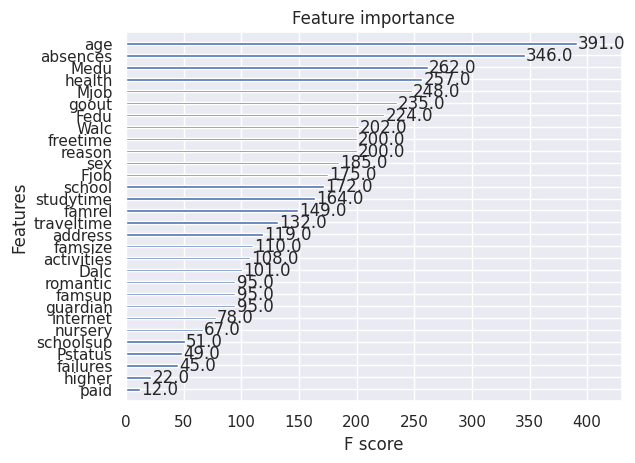

In [138]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [139]:
sel_col = ['school', 'higher', 'Dalc', 'Fedu', 'Walc', 'Medu', 'age', 'absences', 'Mjob', 'failures', 'studytime', 'internet']
x = train[sel_col]
y = train.G3

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.80, random_state = 42)
print(f"Xtrain: {xtrain.shape}")
print(f"Xtest: {xtest.shape}")
print(f"ytrain: {ytrain.shape}")
print(f"ytest: {ytest.shape}")

Xtrain: (400, 13)
Xtest: (100, 13)
ytrain: (400,)
ytest: (100,)


In [141]:
# Modelling
from sklearn.linear_model import LinearRegression # ---------------------------- Import the algorithm for modelling
from sklearn.metrics import r2_score # ----------------------------------------- Import metrics for accuracy measurement
lin_reg = LinearRegression() # ------------------------------------------------- Instantiate the algorithm

lin_reg.fit(xtrain, ytrain) # -------------------------------------------------- Fit the algorithm on the data to become a model
train_validation = lin_reg.predict(xtrain) # ----------------------------------- Predict the same dataset it was trained on
val_score = r2_score(ytrain, train_validation) # ------------------------------- Check the performance of the model on training set

print(f"Accuracy Score on Training is: {val_score.round(2)}")


Accuracy Score on Training is: 0.33


In [110]:
# Modelling
from sklearn.ensemble import RandomForestRegressor # ---------------------------- Import the algorithm for modelling
rf = RandomForestRegressor(n_estimators = 100, random_state = 0) # ------------------------------------------------- Instantiate the algorithm

rf.fit(xtrain, ytrain) # -------------------------------------------------- Fit the algorithm on the data to become a model
train_validation = rf.predict(xtrain) # ----------------------------------- Predict the same dataset it was trained on
val_score = r2_score(ytrain, train_validation) # ------------------------------- Check the performance of the model on training set
val_score_2 = mean_absolute_error(ytrain, train_validation)
val_score_3 = mean_squared_error(ytrain, train_validation)

print(f"Accuracy Score on Training is: {val_score.round(2)}")

Accuracy Score on Training is: 0.88


In [142]:
import pickle
# save model
pickle.dump(rf, open('Student_Performance.pkl', "wb"))

In [109]:
from sklearn.ensemble import GradientBoostingRegressor

titanic_gbc = GradientBoostingRegressor(n_estimators = 100)
titanic_gbc.fit(xtrain, ytrain) # -------------------------------------------------- Fit the algorithm on the data to become a model
train_validation = titanic_gbc.predict(xtrain) # ----------------------------------- Predict the same dataset it was trained on
val_score = r2_score(ytrain, train_validation) # ------------------------------- Check the performance of the model on training set
print(f"Accuracy Score on Training is: {val_score.round(2)}")

Accuracy Score on Training is: 0.58


In [111]:
# Modelling
from sklearn.neighbors import KNeighborsRegressor # ---------------------------- Import the algorithm for modelling
kn = KNeighborsRegressor(n_neighbors=5,  weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski') # ------------------------------------------------- Instantiate the algorithm
kn.fit(xtrain, ytrain) # -------------------------------------------------- Fit the algorithm on the data to become a model
train_validation = kn.predict(xtrain) # ----------------------------------- Predict the same dataset it was trained on
val_score = r2_score(ytrain, train_validation) # ------------------------------- Check the performance of the model on training set
val_score_2 = mean_absolute_error(ytrain, train_validation)
val_score_3 = mean_squared_error(ytrain, train_validation)

print(f"Accuracy Score on Training is: {val_score.round(2)}")


Accuracy Score on Training is: 0.39


In [112]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor() # ------------------------------------------------- Instantiate the algorithm

dt.fit(xtrain, ytrain) # -------------------------------------------------- Fit the algorithm on the data to become a model
train_validation = dt.predict(xtrain) # ----------------------------------- Predict the same dataset it was trained on
val_score = r2_score(ytrain, train_validation) # ------------------------------- Check the performance of the model on training set
val_score_2 = mean_absolute_error(ytrain, train_validation)
val_score_3 = mean_squared_error(ytrain, train_validation)

print(f"Accuracy Score on Training is: {val_score.round(2)}")

Accuracy Score on Training is: 1.0


In [113]:
def models(a, b, c, d, e):
    test_prediction = a.predict(xtest)
    test_val_score = r2_score(ytest, test_prediction) # ------------------------------- Check the performance of the model on training set
    print(f"Accuracy Score on Testing linear Regression: {test_val_score.round(2)}")


    test_prediction = b.predict(xtest)
    test_val_score = r2_score(ytest, test_prediction) # ------------------------------- Check the performance of the model on training set
    print(f"Accuracy Score on Testing Random Forest: {test_val_score.round(2)}")


    test_prediction = c.predict(xtest)
    test_val_score = r2_score(ytest, test_prediction) # ------------------------------- Check the performance of the model on training set
    print(f"Accuracy Score on Testing K Neigbour: {test_val_score.round(2)}")



    test_prediction = d.predict(xtest)
    test_val_score = r2_score(ytest, test_prediction) # ------------------------------- Check the performance of the model on training set
    print(f"Accuracy Score on Testing Decision Tree: {test_val_score.round(2)}")

    test_prediction = e.predict(xtest)
    test_val_score = r2_score(ytest, test_prediction) # ------------------------------- Check the performance of the model on training set
    print(f"Accuracy Score on Testing Decision Tree: {test_val_score.round(2)}")

models(lin_reg, rf, kn, dt, titanic_gbc)

Accuracy Score on Testing linear Regression: 0.22
Accuracy Score on Testing Random Forest: 0.48
Accuracy Score on Testing K Neigbour: 0.19
Accuracy Score on Testing Decision Tree: 0.17
Accuracy Score on Testing Decision Tree: 0.33


In [101]:
# importing the test and carrying out the same process on it.
test_data = pd.read_csv('/content/TestData.csv')
test_data.head(2)

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,413,GP,M,21,R,LE3,T,1,1,at_home,...,5,3,3,5,2,4,21,9,10,10
1,575,MS,F,18,R,GT3,A,4,3,services,...,5,4,4,3,4,2,8,10,11,10


In [102]:
for i in test_data.columns:
    if test_data[i].dtypes == 'int' or test_data[i].dtypes == 'float':
        test_data[[i]] = scaler.fit_transform(test_data[[i]])

for i in test_data.columns:
    if test_data[i].dtypes == 'O':
        test_data[i] = lb.fit_transform(test_data[i])

test_data.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.530994,0,1,3.332530,0,1,1,-1.201784,-1.121118,0,...,1.035648,-0.138741,-0.091723,4.262780,-0.141735,0.292963,3.534615,-0.967364,-0.524483,-0.614309
1,1.482527,1,0,0.906405,0,0,0,1.405971,0.694606,3,...,1.035648,0.800915,0.819392,1.856893,1.547742,-1.092799,0.852849,-0.554363,-0.146957,-0.614309
2,-0.772958,0,1,0.097696,1,0,1,0.536719,0.694606,2,...,0.071201,-0.138741,0.819392,-0.548994,1.547742,0.292963,0.027690,-0.141363,-0.902009,-0.614309
3,0.671962,1,0,-0.711012,0,0,1,-2.071036,-0.213256,2,...,-0.893246,-1.078398,-0.091723,-0.548994,-0.141735,-1.092799,-0.797469,0.271638,-0.146957,0.061204
4,-1.272219,0,0,-1.519721,1,0,1,-0.332533,-0.213256,2,...,1.035648,-2.018054,-1.002838,-0.548994,-0.986473,-0.399918,0.027690,-0.554363,-0.524483,-0.614309


In [103]:
sel_col = ['school', 'higher', 'Dalc', 'Fedu', 'Walc', 'Medu', 'age', 'Medu', 'absences', 'Mjob', 'failures', 'studytime', 'internet']
xtest = test_data[sel_col]
ytest = test_data.G3

In [114]:
def models(a, b, c, d, e):
    test_prediction = a.predict(xtest)
    test_val_score = r2_score(ytest, test_prediction) # ------------------------------- Check the performance of the model on training set
    print(f"Accuracy Score on Testing linear Regression: {test_val_score.round(2)}")


    test_prediction = b.predict(xtest)
    test_val_score = r2_score(ytest, test_prediction) # ------------------------------- Check the performance of the model on training set
    print(f"Accuracy Score on Testing Random Forest: {test_val_score.round(2)}")


    test_prediction = c.predict(xtest)
    test_val_score = r2_score(ytest, test_prediction) # ------------------------------- Check the performance of the model on training set
    print(f"Accuracy Score on Testing K Neigbour: {test_val_score.round(2)}")



    test_prediction = d.predict(xtest)
    test_val_score = r2_score(ytest, test_prediction) # ------------------------------- Check the performance of the model on training set
    print(f"Accuracy Score on Testing Decision Tree: {test_val_score.round(2)}")

    test_prediction = e.predict(xtest)
    test_val_score = r2_score(ytest, test_prediction) # ------------------------------- Check the performance of the model on training set
    print(f"Accuracy Score on Testing Decision Tree: {test_val_score.round(2)}")

models(lin_reg, rf, kn, dt, titanic_gbc)

Accuracy Score on Testing linear Regression: 0.22
Accuracy Score on Testing Random Forest: 0.48
Accuracy Score on Testing K Neigbour: 0.19
Accuracy Score on Testing Decision Tree: 0.17
Accuracy Score on Testing Decision Tree: 0.33
